<a href="https://colab.research.google.com/github/lin3372/LvL200_ML_DatSci/blob/main/150_Bayes_Classification_(Scikit_learn).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Naive Bayes Classification
[Day12-Scikit-learn介紹(4)_ Bayes Classification](https://ithelp.ithome.com.tw/articles/10205582)

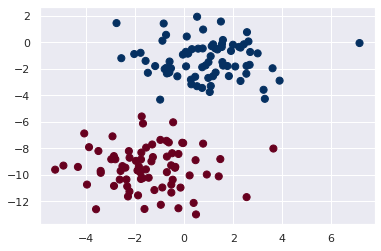

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.datasets import make_blobs
X, y = make_blobs(150, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

創建貝氏糢型的一種非常快速的方法就是假設數據由高斯分佈描述，維度之間沒有平方差關係。只需找到每個標籤內各點的平均值和標準即可擬合此糢型，這就是定義這種分佈所需的全部內容：

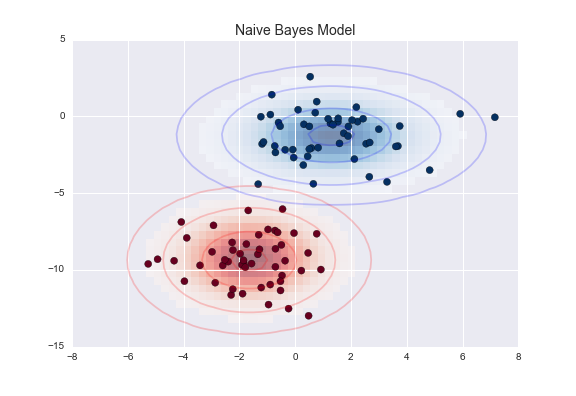